In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe(include = 'all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
#encoding categorical data
df = pd.get_dummies(df,drop_first = True)
df.head(20)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
5,15574012,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True
6,15592531,822,50,7,0.00,2,1,1,10062.80,0,False,False,True
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False
8,15792365,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True
9,15592389,684,27,2,134603.88,1,1,1,71725.73,0,False,False,True


In [7]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

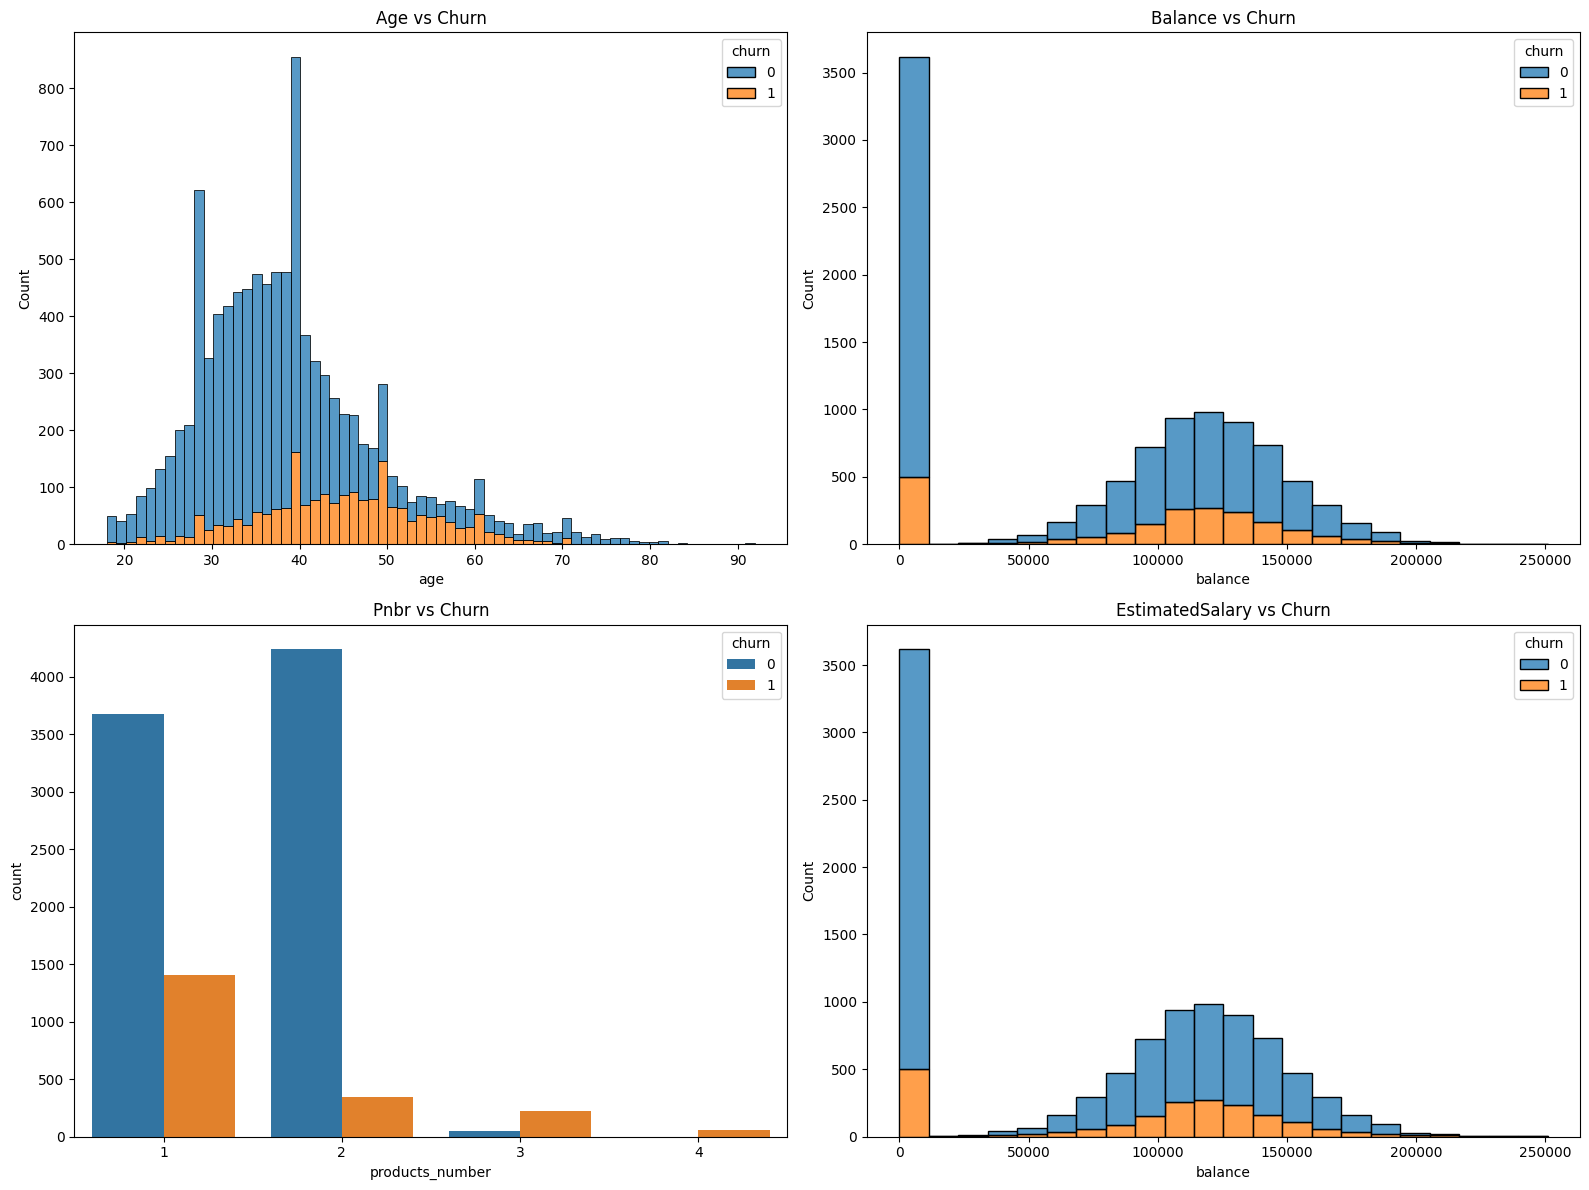

In [8]:
import matplotlib.pyplot as plt
# Churn distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#age vs churn
sns.histplot(data = df, x = 'age', hue = 'churn', multiple = 'stack', ax = axes[0, 0])
axes[0, 0].set_title('Age vs Churn')

#balance vs churn
sns.histplot(data = df, x = 'balance', hue = 'churn', multiple = 'stack', ax = axes[0, 1])
axes[0, 1].set_title('Balance vs Churn')

#PNbr vs churn
sns.countplot(data = df, x = 'products_number', hue = 'churn', ax = axes[1, 0])
axes[1, 0].set_title('Pnbr vs Churn')

#estimated salary vs churn
sns.histplot(data = df, x = 'balance', hue = 'churn', multiple = 'stack', ax = axes[1, 1])
axes[1, 1].set_title('EstimatedSalary vs Churn')

plt.tight_layout()
plt.show()

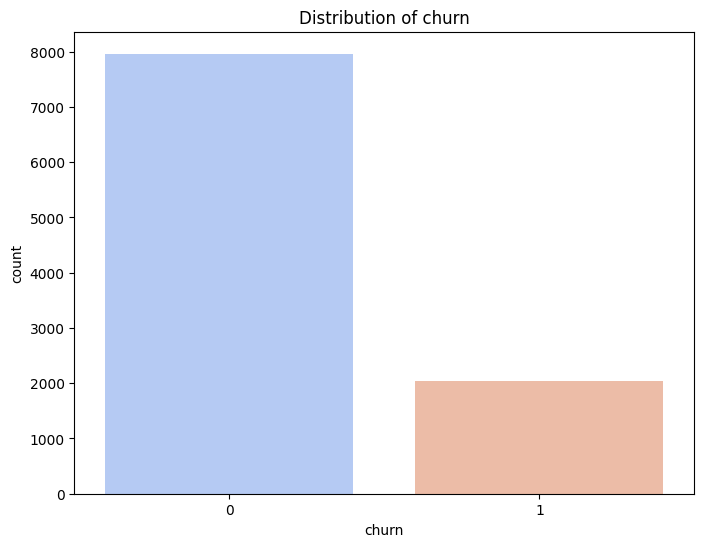

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
sns.countplot(x = 'churn', data = df, palette='coolwarm')
plt.title('Distribution of churn')
plt.xlabel('churn')
plt.ylabel('count')
plt.show()

In [10]:
X = df.drop('churn', axis = 1)  
y = df['churn']

from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)
y_res.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

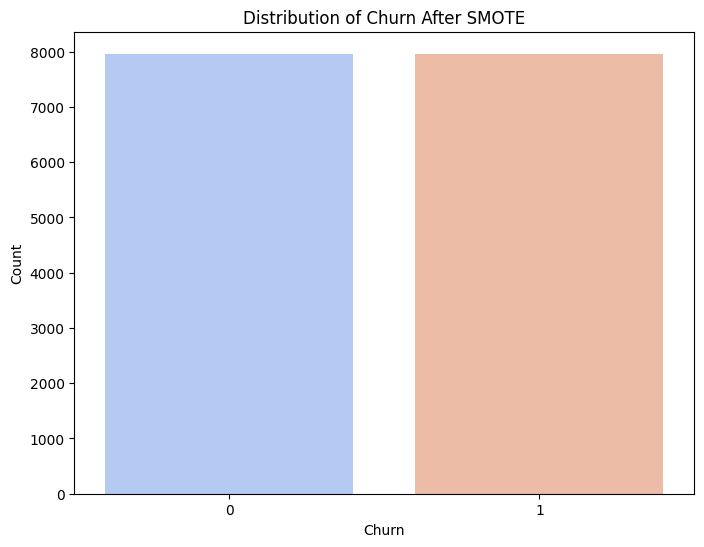

In [11]:
# new distribution after balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res, palette='coolwarm')
plt.title('Distribution of Churn After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [12]:
#create new features fom the data frame 
#balance salary ratio
df['blance_salary_ratio'] = df['balance'] / df['estimated_salary']

#age groups
bins = [0, 30, 50, 100]
labels = ['young', 'middle-aged', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#feature
df['age_balance_interaction'] = df['age'] * df['balance']
df['average_balance_per_product'] = df['balance'] / df['products_number']

df.head(20)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,blance_salary_ratio,age_group,age_balance_interaction,average_balance_per_product
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,0.000000,middle-aged,0.00,0.000000
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,0.744677,middle-aged,3436122.26,83807.860000
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,1.401375,middle-aged,6705753.60,53220.266667
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,0.000000,middle-aged,0.00,0.000000
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False,1.587055,middle-aged,5396965.26,125510.820000
5,15574012,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True,0.759604,middle-aged,5005254.32,56877.890000
6,15592531,822,50,7,0.00,2,1,1,10062.80,0,False,False,True,0.000000,senior,0.00,0.000000
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False,0.963969,young,3336355.46,28761.685000
8,15792365,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True,1.895518,middle-aged,6250247.08,71025.535000
9,15592389,684,27,2,134603.88,1,1,1,71725.73,0,False,False,True,1.876647,young,3634304.76,134603.880000


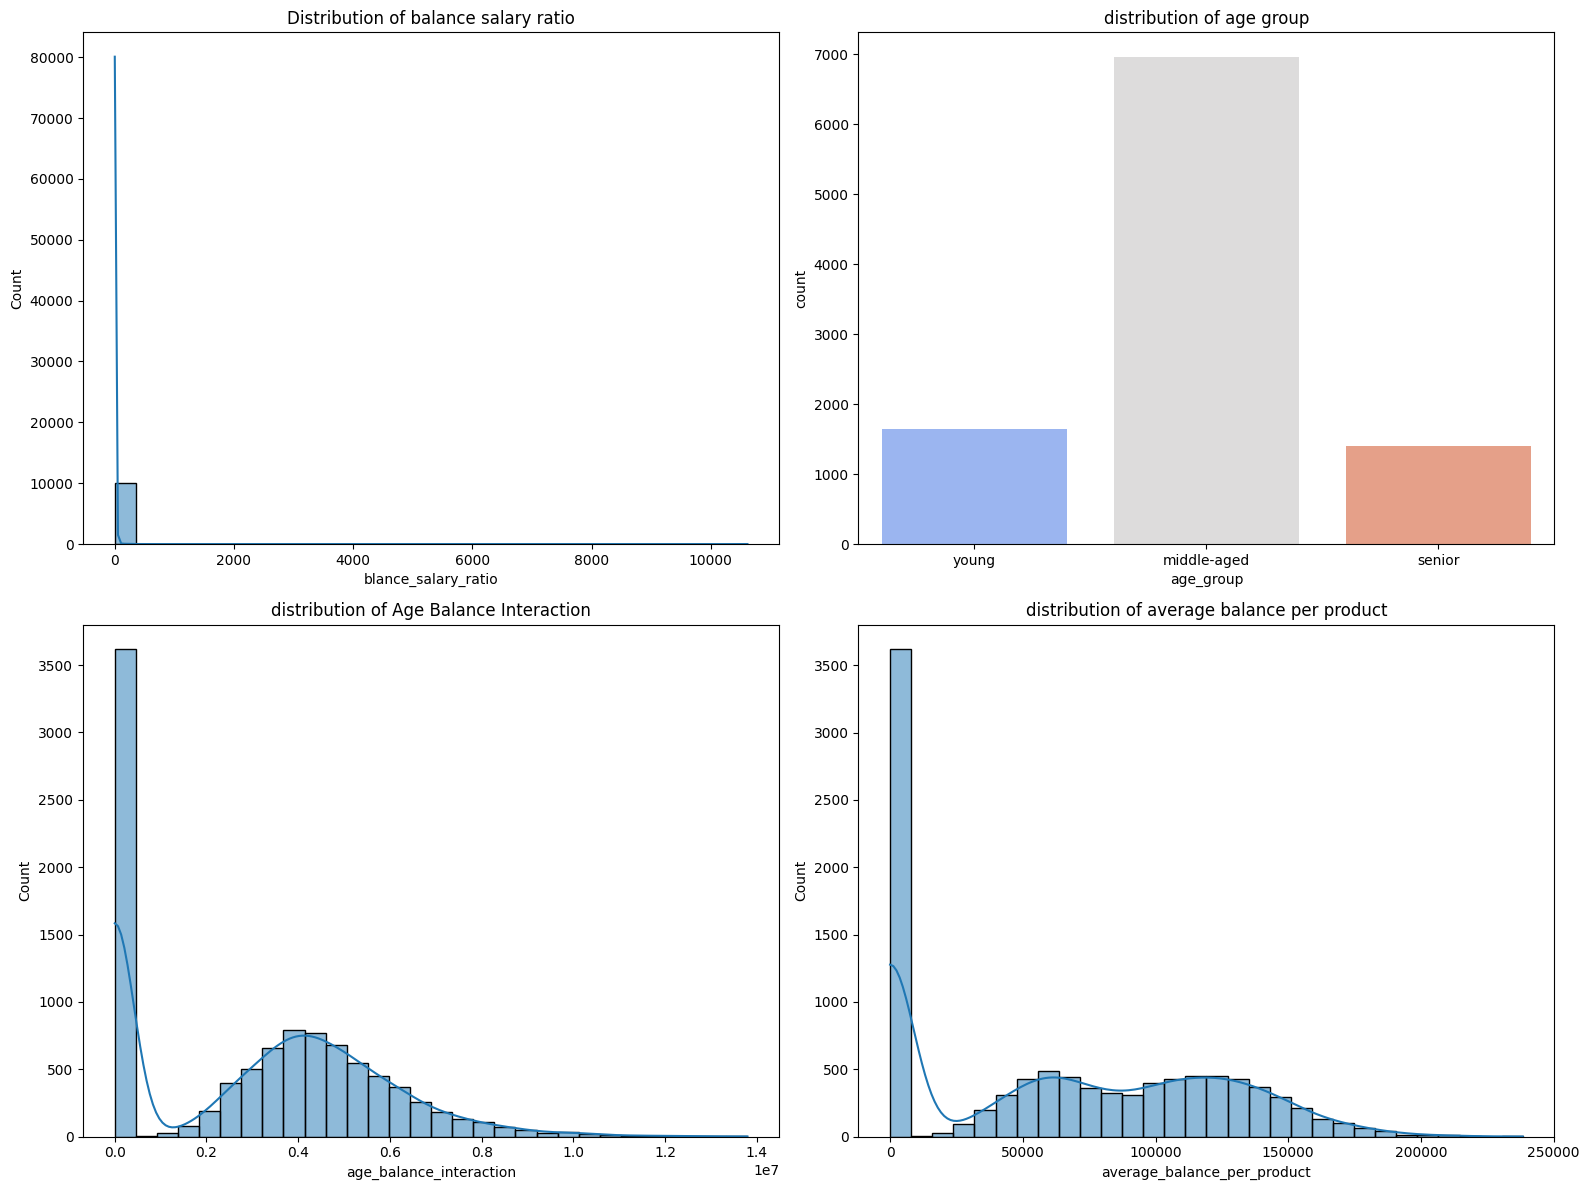

In [13]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

#balance salary ratio
sns.histplot(df['blance_salary_ratio'], bins = 30, kde = True, ax = axes[0, 0])
axes[0, 0].set_title('Distribution of balance salary ratio')

#age group
sns.countplot(x = 'age_group', data = df, palette = 'coolwarm', ax = axes[0, 1])
axes[0, 1].set_title('distribution of age group')

#age balance interaction 
sns.histplot(df['age_balance_interaction'], bins = 30, kde = True, ax = axes[1, 0])
axes[1, 0].set_title('distribution of Age Balance Interaction')

#average balance per product
sns.histplot(df['average_balance_per_product'], bins = 30, kde = True, ax = axes[1, 1])
axes[1, 1].set_title('distribution of average balance per product')

plt.tight_layout()
plt.show()

1-Distribution of Balance Salary Ratio:

The vast majority of customers have a balance salary ratio close to zero. This indicates that many customers have a low balance relative to their estimated salary.
There are a few customers with a significantly higher balance salary ratio, suggesting that they have a much higher balance compared to their estimated salary.

2-Distribution of Age Group:

The majority of customers fall into the 'middle-aged' category.
The 'young' and 'senior' age groups are less represented in the dataset.
This distribution can be important for targeted marketing or customer retention strategies, focusing more on the middle-aged demographic.

3-Distribution of Age Balance Interaction:

Most customers have a low age balance interaction value, which means either their age or balance (or both) are low.
There is a noticeable distribution with a peak around certain interaction values, indicating some common age-balance interactions among customers.
A long tail suggests that there are customers with very high age balance interaction, possibly older customers with higher balances.

4-Distribution of Average Balance Per Product:

Similar to the balance salary ratio, most customers have a low average balance per product.
There is a spread of values with a noticeable peak, indicating common average balances per product for a significant number of customers.
The distribution also shows that some customers have a significantly higher average balance per product, indicating higher engagement or investment in the bank's products.

Key Insights:
Customer Segmentation: The age distribution highlights that most customers are middle-aged. Targeted strategies could be developed for different age groups.
Balance Management: Many customers have low balances relative to their salary and per product, indicating a potential area for financial advisory services or personalized banking products.
High-Value Customers: Identifying customers with high balance salary ratios or high average balances per product can help focus on high-value customers for retention and personalized offers.
Product Usage: The spread in average balance per product suggests varied usage of banking products, which can be analyzed further to understand customer behavior and preferences.

In [14]:
#spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 47)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train


array([[ 1.49403198,  0.76895843, -0.89785629, ..., -0.76462291,
         1.57668282, -1.2218201 ],
       [-1.23439657, -0.68164815, -0.79785327, ..., -0.76462291,
        -0.63424297,  0.81845109],
       [-1.0449214 , -1.33002533,  0.20217689, ..., -0.76462291,
         1.57668282,  0.81845109],
       ...,
       [-0.62079864, -0.45086983, -1.49787439, ...,  1.30783422,
        -0.63424297,  0.81845109],
       [ 0.34831252,  0.48323289, -0.99785931, ..., -0.76462291,
        -0.63424297,  0.81845109],
       [ 0.7565938 ,  1.64811394,  2.20223722, ..., -0.76462291,
        -0.63424297, -1.2218201 ]])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

log = LogisticRegression()
log.fit(X_train, y_train)


y_pred1 = log.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")
print(classification_report(y_test, y_pred1))


Accuracy: 0.7653830054416074
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      2441
           1       0.75      0.78      0.76      2337

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



Precision: The precision for class 0 is slightly higher than for class 1, indicating that the model is better at predicting class 0 instances correctly.
Recall: The recall for class 1 is slightly higher than for class 0, suggesting that the model is better at capturing actual instances of class 1 compared to class 0.
F1-Score: Both classes have very similar F1-Scores, indicating a balance between precision and recall for each class.
Accuracy: The overall accuracy is 0.76, which is a moderate performance for this model.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(classification_report(y_test, y_pred2))


Accuracy: 0.8168689828380076
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2441
           1       0.80      0.83      0.82      2337

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



Precision: The precision for class 0 is higher than for class 1, indicating that the model is better at predicting class 0 instances correctly.
Recall: The recall for class 1 is higher than for class 0, suggesting that the model is better at capturing actual instances of class 1 compared to class 0.
F1-Score: Both classes have the same F1-Score of 0.81, showing a balance between precision and recall for each class.
Accuracy: The overall accuracy is 0.81, which is a reasonable performance for this model.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred3 = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred3)}")
print(classification_report(y_test, y_pred3))


Accuracy: 0.7881958978652156
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      2441
           1       0.77      0.81      0.79      2337

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



Precision: The precision for class 0 remains higher than for class 1, indicating that the model is better at predicting class 0 than class 1.
Recall: The recall for class 1 is higher than for class 0, suggesting that the model is better at capturing actual instances of class 1 compared to class 0.
F1-Score: Both classes have the same F1-Score of 0.80, indicating a balance between precision and recall for each class.
Accuracy: The overall accuracy has decreased to 0.80, indicating a drop in the model's performance compared to the previous reports.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred4 = gbc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred4)}")
print(classification_report(y_test, y_pred4))

Accuracy: 0.8342402678945166
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2441
           1       0.83      0.83      0.83      2337

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778



The model's precision and recall for both classes are almost identical, which indicates a balanced performance across both classes.
Compared to the previous report, there is a slight drop in both precision and recall for class 1, and a slight drop in recall for class 0.
The F1-Score also shows a minor decrease, reflecting the small changes in precision and recall.
The accuracy of 0.83 is slightly lower than the previous accuracy of 0.8472, indicating a minor decrease in overall model performance.

In [19]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

y_pred5 = model_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred5)}")
print(classification_report(y_test, y_pred5))

Accuracy: 0.8537044788614483
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2441
           1       0.85      0.86      0.85      2337

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



The model performs similarly on both classes (0 and 1), with slight variations.
Both classes have high precision and recall values, indicating that the model is balanced and performs well in both identifying true positives and true negatives.
The F1-Score, being a balance between precision and recall, shows that the model maintains consistency in performance across both metrics.
The support values indicate that the dataset is fairly balanced between the two classes, with a slight majority for class 0.

In [20]:
#accuracy summary

perfomance_summary = pd.DataFrame({
    'Model' :['LR', 'KNN', 'DT', 'GBC', 'XGB'],
    'ACC' :[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           ]
})

perfomance_summary

,Model,ACC
0,LR,0.765383
1,KNN,0.816869
2,DT,0.788196
3,GBC,0.834240
4,XGB,0.853704


<Axes: xlabel='Model', ylabel='ACC'>

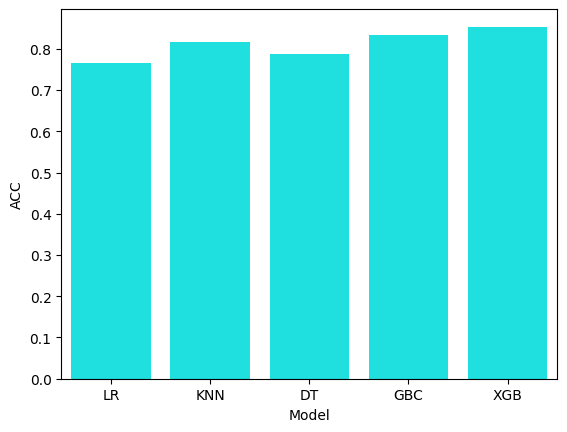

In [21]:
sns.barplot(x='Model', y='ACC', data=perfomance_summary, color='cyan')


In [22]:
#saving the best model
X_train = sc.fit_transform(X_train)
model_xgb.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

model_xgb = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')

grid_search = GridSearchCV(estimator = model_xgb, param_grid = param_grid,
                    scoring = 'accuracy', cv = 3, verbose = 1,n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best score: 0.8551309651955509
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2441
           1       0.85      0.86      0.86      2337

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



Precision, Recall, and F1-Score:

Both classes have very similar precision, recall, and F1-score values (0.85), indicating balanced performance across the classes.
The high precision and recall values for both classes show that the model is effective at both identifying true positives and capturing actual instances of each class.
Accuracy:

The overall accuracy of 0.85 indicates that the model correctly predicts 85% of the instances in the test set.
Balanced Performance:

The macro average and weighted average metrics are identical, reinforcing that the model handles both classes equally well without bias towards either class.

In [24]:
import shap

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

shap.initjs()
shap.plots.force(shap_values[0])




 98%|===================| 4704/4778 [00:39<00:00]        

In [25]:
import pickle

with open('churn_predict_best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'churn_predict_best_model.pkl'")

Model saved as 'churn_predict_best_model.pkl'


In [27]:
import pandas as pd
import pickle

# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Create derived features
bins = [0, 30, 50, 100]
labels = ['young', 'middle-aged', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# One-hot encode categorical columns
categorical_columns = ['country', 'gender', 'age_group']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Prepare final dataset for model training
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# List of expected columns after preprocessing
expected_columns = X.columns.tolist()

# Save preprocessing info
preprocessing_info = {
    'categorical_columns': categorical_columns,
    'columns': expected_columns
}

with open('preprocessing_info.pkl', 'wb') as file:
    pickle.dump(preprocessing_info, file)

print("preprocessing_info.pkl created successfully.")


preprocessing_info.pkl created successfully.


In [29]:
import pickle

# Load the preprocessing info
with open('preprocessing_info.pkl', 'rb') as file:
    preprocessing_info = pickle.load(file)

print("Categorical Columns:", preprocessing_info['categorical_columns'])
print("Expected Columns:", preprocessing_info['columns'])


Categorical Columns: ['country', 'gender', 'age_group']
Expected Columns: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'country_Germany', 'country_Spain', 'gender_Male', 'age_group_middle-aged', 'age_group_senior']
